In [1]:
import json
with open('keys.json') as f:
    key_chain = json.loads(f.read())
#the api key expires every 24 hours

In [2]:
key = key_chain['Lol']['Key']

In [11]:
#the api key expires every 24 hours
#sharing this wouldnt matter cause by the time anyone reads this, the key will have expired :P
key = 'RGAPI-c87f6d64-4433-475c-a9d6-1593446c60fe'

In [12]:
#take = input("Summoner Name ")
take = ''
if len(take) == 0:
    take = "imaqtpie"
    #take = "captaincrunchys"
summoner = {"name":take}

### Imports

In [13]:
import requests
import pandas as pd
import time
import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [14]:
def get_matchs(game_id = 2665734035):
    """
    have an empty
    matchs = {} before code
    """
    time.sleep(0.055)
    game = requests.get("https://na1.api.riotgames.com/lol/match/v3/matches/"+str(game_id)+url_comp)
    #The api gives painful dictionaries that require iteration to get the player's stats that match
    
    
    #This finds the participation id value for this particular match
    for i,j in enumerate(game.json()['participantIdentities']):
        if j['player']['summonerName'].lower().strip() == summoner['name'].lower():
            part_id = j['participantId']

            
    #this iterates through 'participants' of each match and finds the data refering to our summoner
    for i in game.json()['participants']:
        if i['participantId'] == part_id:
            stats = i
    stats['stats']['duration'] = game.json()['gameDuration']
    stats['stats']['gameMode'] = game.json()['gameMode']
    stats['stats']['gameType'] = game.json()['gameType']
    stats['stats']['gameId'] = game_id
    matchs[str(game_id)] = stats['stats']
    return

### Apis for Summoner

In [15]:
#api time limit = 20req per 1 sec
#player info requires '?'
url_comp = '?api_key='+key

#champ info requires '&'
url_comp_2 = '&api_key='+key

In [16]:
#get summoner info
eg = requests.get("https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-name/"+summoner["name"]+url_comp)

In [17]:
eg

<Response [200]>

In [18]:
summoner['accountId'] = str(eg.json()['accountId'])
summoner['id'] = str(eg.json()['id'])

In [19]:
#get match info
eg2 = requests.get("https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/"+summoner['accountId']+url_comp)

In [22]:
#get champ info - static info

#champ = requests.get('https://na1.api.riotgames.com/lol/static-data/v3/champions?locale=en_US&dataById=false'+url_comp_2)
#champs = pd.DataFrame(champ.json()['data']).transpose()
#champs.to_csv('champs.csv')
champs = pd.read_csv('champs.csv')
champs = champs.drop(['Unnamed: 0','key','title'],axis=1).sort_values('id').reset_index(drop=True)

###  Api for Match History

In [23]:
for i,j in enumerate(eg2.json()['matches']):
    if i == 0:
        player = pd.DataFrame([j])
    else:
        player = player.append(pd.DataFrame([j]))

In [24]:
player = player.merge(champs,left_on='champion',right_on='id')
del player['champion'], player['id'], eg, eg2
player = player.rename(columns={'name':'champion'}).sort_values('timestamp').reset_index(drop=True)

In [30]:
#make aggregate info from each game into a df
matchs = {}
for i in tqdm.tqdm_notebook(player.gameId):
    try: get_matchs(i)
    except:
        pass

HBox(children=(IntProgress(value=0), HTML(value='')))

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/Nahel/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/Nahel/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/Nahel/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [31]:
matchs = pd.DataFrame(matchs).transpose()

In [32]:
player_stats = player.merge(matchs,left_on='gameId',right_on='gameId')

### Lookin at Stats

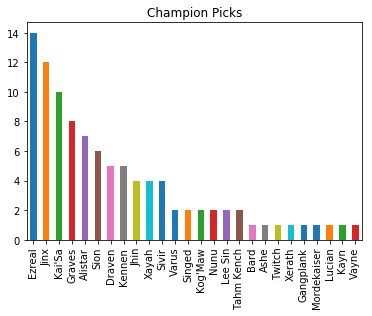

In [34]:
ax = player_stats.champion.value_counts().plot(kind='bar')
ax.set_title('Champion Picks');

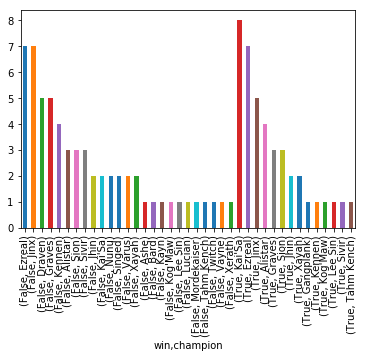

In [35]:
player_stats.groupby('win')['champion'].value_counts().plot(kind='bar');

In [36]:
player_stats.groupby(['champion'])['win'].value_counts()

champion     win  
Alistar      True     4
             False    3
Ashe         False    1
Bard         False    1
Draven       False    5
Ezreal       False    7
             True     7
Gangplank    True     1
Graves       False    5
             True     3
Jhin         False    2
             True     2
Jinx         False    7
             True     5
Kai'Sa       True     8
             False    2
Kayn         False    1
Kennen       False    4
             True     1
Kog'Maw      False    1
             True     1
Lee Sin      False    1
             True     1
Lucian       False    1
Mordekaiser  False    1
Nunu         False    2
Singed       False    2
Sion         False    3
             True     3
Sivir        False    3
             True     1
Tahm Kench   False    1
             True     1
Twitch       False    1
Varus        False    2
Vayne        False    1
Xayah        False    2
             True     2
Xerath       False    1
Name: win, dtype: int64

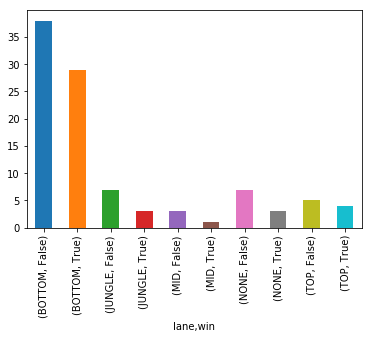

In [37]:
player_stats.groupby('lane')['win'].value_counts().plot(kind='bar')

In [49]:
player_stats.columns[:100]

Index(['gameId', 'lane', 'platformId', 'queue', 'role', 'season', 'timestamp',
       'champion', 'assists', 'champLevel', 'combatPlayerScore',
       'damageDealtToObjectives', 'damageDealtToTurrets',
       'damageSelfMitigated', 'deaths', 'doubleKills', 'duration',
       'firstBloodAssist', 'firstBloodKill', 'firstInhibitorAssist',
       'firstInhibitorKill', 'firstTowerAssist', 'firstTowerKill', 'gameMode',
       'gameType', 'goldEarned', 'goldSpent', 'inhibitorKills', 'item0',
       'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'killingSprees',
       'kills', 'largestCriticalStrike', 'largestKillingSpree',
       'largestMultiKill', 'longestTimeSpentLiving', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicalDamageTaken',
       'neutralMinionsKilled', 'neutralMinionsKilledEnemyJungle',
       'neutralMinionsKilledTeamJungle', 'objectivePlayerScore',
       'participantId', 'pentaKills', 'perk0', 'perk0Var1', 'perk0Var2',
       'perk0Var3', 'perk1', 'p

In [50]:
player_stats.columns[101:201]

Index(['tripleKills', 'trueDamageDealt', 'trueDamageDealtToChampions',
       'trueDamageTaken', 'turretKills', 'unrealKills', 'visionScore',
       'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'win'],
      dtype='object')